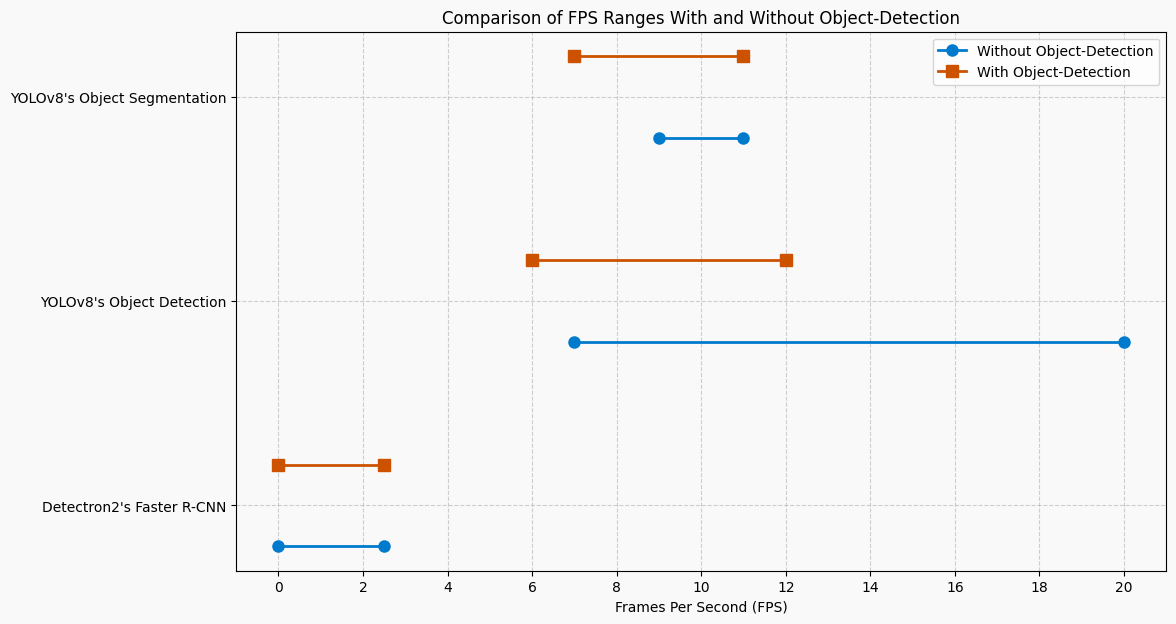

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    'Model': ['Detectron2\'s Faster R-CNN', 'YOLOv8\'s Object Detection', 'YOLOv8\'s Object Segmentation'],
    'FPS Without Object-Detection Min': [0, 7, 9],
    'FPS Without Object-Detection Max': [2.5, 20, 11],
    'FPS With Object-Detection Min': [0, 6, 7],
    'FPS With Object-Detection Max': [2.5, 12, 11]
}

df = pd.DataFrame(data)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Color and style settings
colors = ['#007acc', '#cc5200']  # Blue for without, Orange for with
markers = ['o', 's']  # Circle for without, Square for with
labels = ['Without Object-Detection', 'With Object-Detection']

# Adding range bars for each category
models = df['Model']
x = range(len(models))

for i in x:
    ax.plot([df.loc[i, 'FPS Without Object-Detection Min'], df.loc[i, 'FPS Without Object-Detection Max']],
            [i - 0.2, i - 0.2], marker=markers[0], color=colors[0], markersize=8,
            label=labels[0] if i == 0 else "", linestyle='-', linewidth=2)
    ax.plot([df.loc[i, 'FPS With Object-Detection Min'], df.loc[i, 'FPS With Object-Detection Max']],
            [i + 0.2, i + 0.2], marker=markers[1], color=colors[1], markersize=8,
            label=labels[1] if i == 0 else "", linestyle='-', linewidth=2)

# Adjusting the y-axis to align labels in the center of the grouped bars
ax.set_yticks(x)
ax.set_yticklabels(models)
ax.set_xlabel('Frames Per Second (FPS)')
ax.set_title('Comparison of FPS Ranges With and Without Object-Detection')

# Setting x-axis ticks
max_fps = df[['FPS Without Object-Detection Max', 'FPS With Object-Detection Max']].max().max()
ax.set_xticks(range(0, int(max_fps) + 2, 2))  # Adjust the step as necessary

# Adding legend and grid
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Set the background color
ax.set_facecolor('#f9f9f9')
fig.patch.set_facecolor('#f9f9f9')

plt.show()


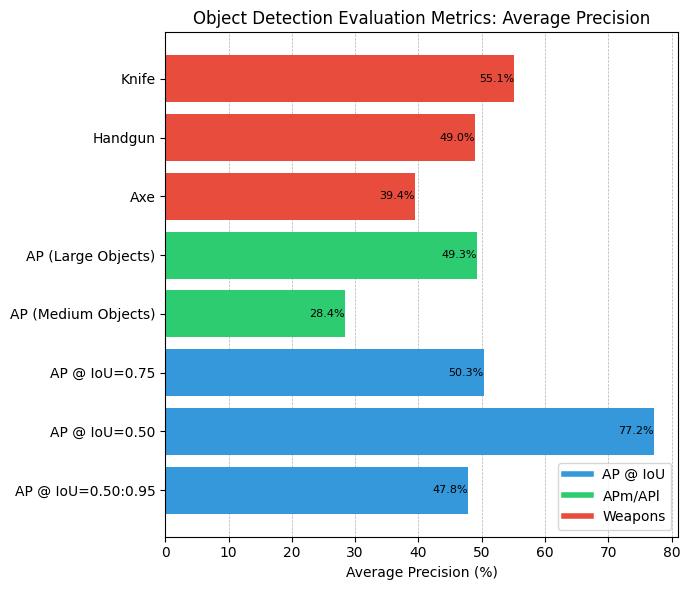

In [ ]:
import matplotlib.pyplot as plt

# Data
metrics = ['AP @ IoU=0.50:0.95', 'AP @ IoU=0.50', 'AP @ IoU=0.75', 'AP (Medium Objects)', 'AP (Large Objects)', 'Axe', 'Handgun', 'Knife']
values = [47.8, 77.2, 50.3, 28.4, 49.3, 39.4, 49.0, 55.1]

# Colors for differentiation (one per subcategory)
colors = ['#3498db', '#3498db', '#3498db', '#2ecc71', '#2ecc71', '#e74c3c', '#e74c3c', '#e74c3c']

# Create figure and axis with adjusted dimensions
fig, ax = plt.subplots(figsize=(7, 6))

# Plot
bars = ax.barh(metrics, values, color=colors)

# Add data labels
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.1f}%',
            va='center', ha='right', color='black', fontsize=8)

# Set labels, title, and grid
ax.set_xlabel('Average Precision (%)')
ax.set_title('Object Detection Evaluation Metrics: Average Precision')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, axis='x')
ax.set_axisbelow(True)

# Add legend (optional, but useful for clarity)
legend_elements = [
    plt.Line2D([0], [0], color='#3498db', lw=4, label='AP @ IoU'),
    plt.Line2D([0], [0], color='#2ecc71', lw=4, label='APm/APl'),
    plt.Line2D([0], [0], color='#e74c3c', lw=4, label='Weapons')
]
ax.legend(handles=legend_elements, loc='lower right')  # Adjust location as needed

plt.tight_layout()
plt.show()


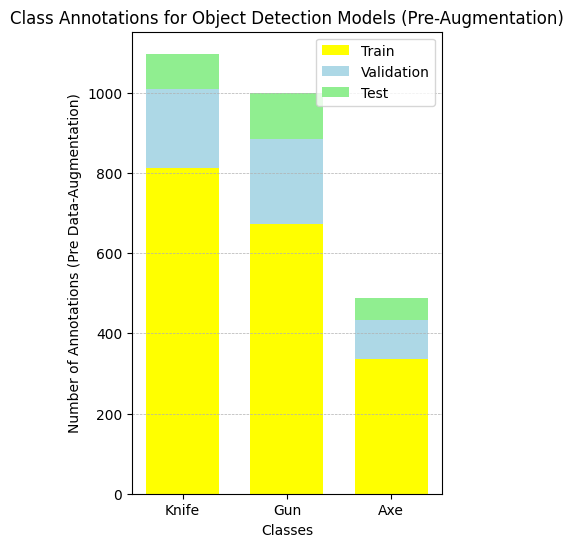

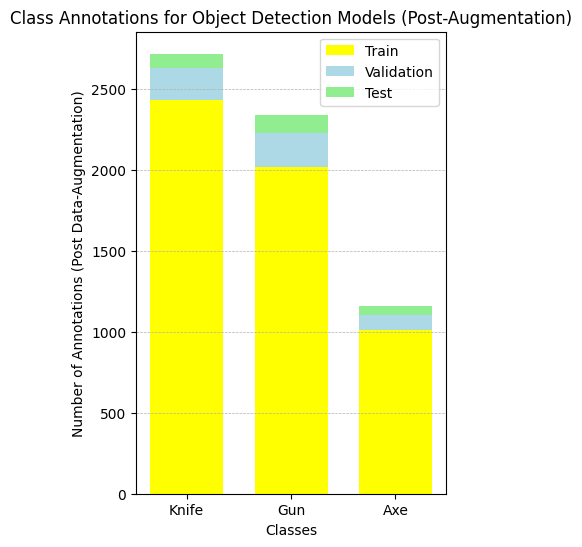

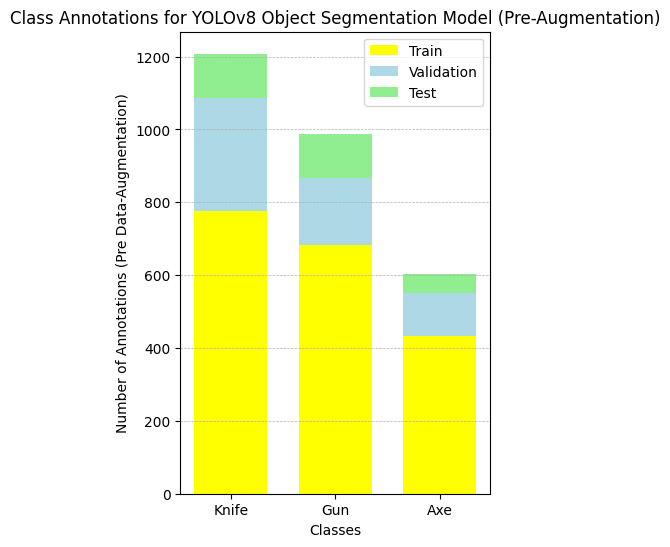

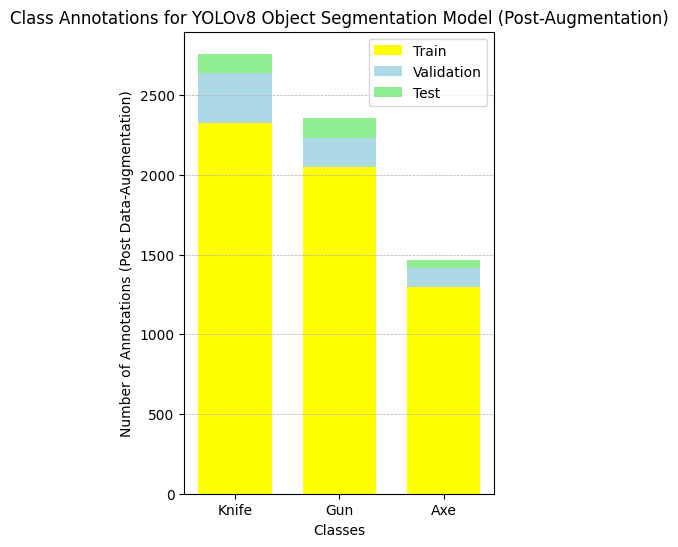

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datasets from the tables you provided
data_pre_detection = {
    'Classes': ['Knife', 'Gun', 'Axe'],
    'Train': [811, 672, 337],
    'Valid': [197, 212, 96],
    'Test': [89, 115, 56]
}

data_post_detection = {
    'Classes': ['Knife', 'Gun', 'Axe'],
    'Train': [2433, 2016, 1011],
    'Valid': [197, 212, 96],
    'Test': [89, 115, 56]
}

data_pre_segmentation = {
    'Classes': ['Knife', 'Gun', 'Axe'],
    'Train': [776, 683, 432],
    'Valid': [311, 184, 120],
    'Test': [121, 121, 51]
}

data_post_segmentation = {
    'Classes': ['Knife', 'Gun', 'Axe'],
    'Train': [2328, 2049, 1296],
    'Valid': [311, 184, 120],
    'Test': [121, 121, 51]
}

# Function to plot stacked bar charts
def create_stacked_bar_plot(title, data, ylabel):
    ind = np.arange(len(data['Classes']))  # x locations for the groups
    width = 0.7  # Increased bar width to reduce spacing between bars

    train_values = data['Train']
    val_values = data['Valid']
    test_values = data['Test']

    # Creating the stacked bar chart
    p1 = plt.bar(ind, train_values, width, color='yellow', label='Train')
    p2 = plt.bar(ind, val_values, width, bottom=train_values, color='lightblue', label='Validation')
    p3 = plt.bar(ind, test_values, width, bottom=np.array(train_values) + np.array(val_values), color='lightgreen', label='Test')

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    plt.ylabel(ylabel)
    plt.xlabel('Classes')
    plt.title(title)
    plt.xticks(ind, data['Classes'])
    plt.legend()

    # Adjust figure size to maintain height but make the width narrower
    plt.gcf().set_size_inches(4, 6)  # Adjusted size to be narrower (width x height)
    plt.show()

# Generate plots for each dataset
create_stacked_bar_plot(
    "Class Annotations for Object Detection Models (Pre-Augmentation)",
    data_pre_detection,
    "Number of Annotations (Pre Data-Augmentation)"
)

create_stacked_bar_plot(
    "Class Annotations for Object Detection Models (Post-Augmentation)",
    data_post_detection,
    "Number of Annotations (Post Data-Augmentation)"
)

create_stacked_bar_plot(
    "Class Annotations for YOLOv8 Object Segmentation Model (Pre-Augmentation)",
    data_pre_segmentation,
    "Number of Annotations (Pre Data-Augmentation)"
)

create_stacked_bar_plot(
    "Class Annotations for YOLOv8 Object Segmentation Model (Post-Augmentation)",
    data_post_segmentation,
    "Number of Annotations (Post Data-Augmentation)"
)


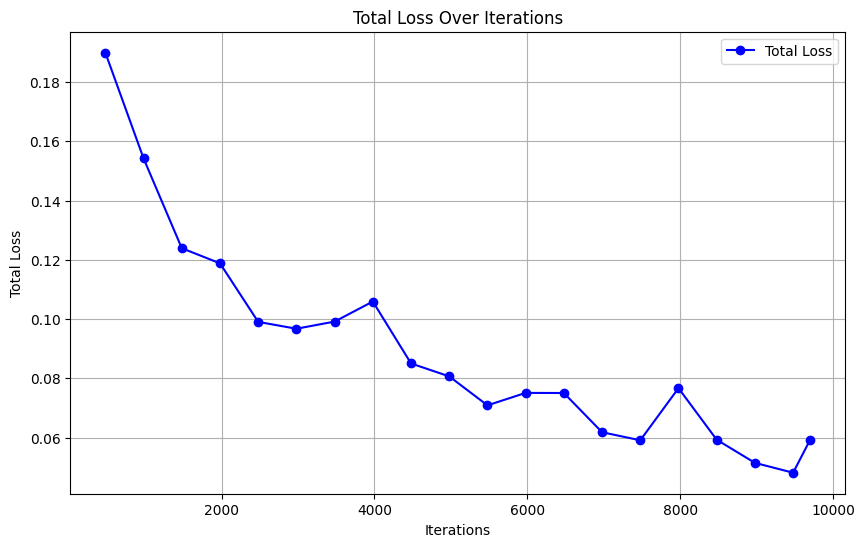

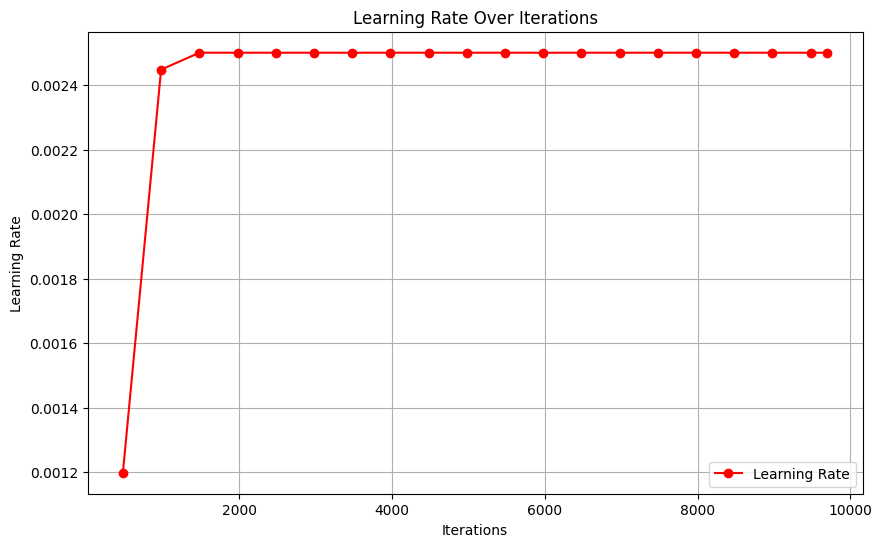

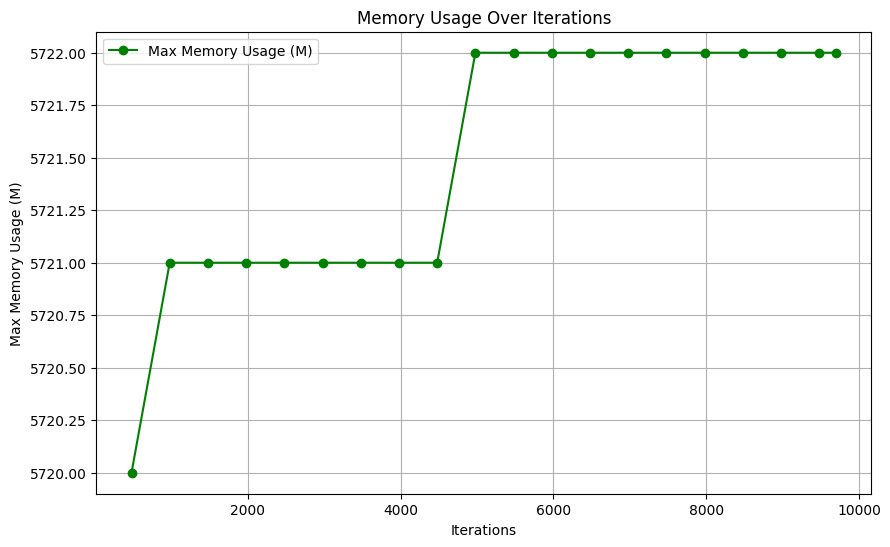

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from your logs
iterations = [479, 979, 1479, 1979, 2479, 2979, 3479, 3979, 4479, 4979, 5479, 5979, 6479, 6979, 7479, 7979, 8479, 8979, 9479, 9699]
total_loss = [0.1899, 0.1542, 0.1239, 0.1188, 0.09903, 0.09672, 0.09914, 0.1059, 0.085, 0.08063, 0.07086, 0.07506, 0.07502, 0.06178, 0.05906, 0.07666, 0.05925, 0.05144, 0.04811, 0.05909]
learning_rate = [0.0011988, 0.0024476, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025]
max_memory = [5720, 5721, 5721, 5721, 5721, 5721, 5721, 5721, 5721, 5722, 5722, 5722, 5722, 5722, 5722, 5722, 5722, 5722, 5722, 5722]

# Plotting total loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_loss, marker='o', color='b', label='Total Loss')
plt.title('Total Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Total Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting learning rate over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, learning_rate, marker='o', color='r', label='Learning Rate')
plt.title('Learning Rate Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.legend()
plt.show()

# Plotting memory usage over iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations, max_memory, marker='o', color='g', label='Max Memory Usage (M)')
plt.title('Memory Usage Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Max Memory Usage (M)')
plt.grid(True)
plt.legend()
plt.show()


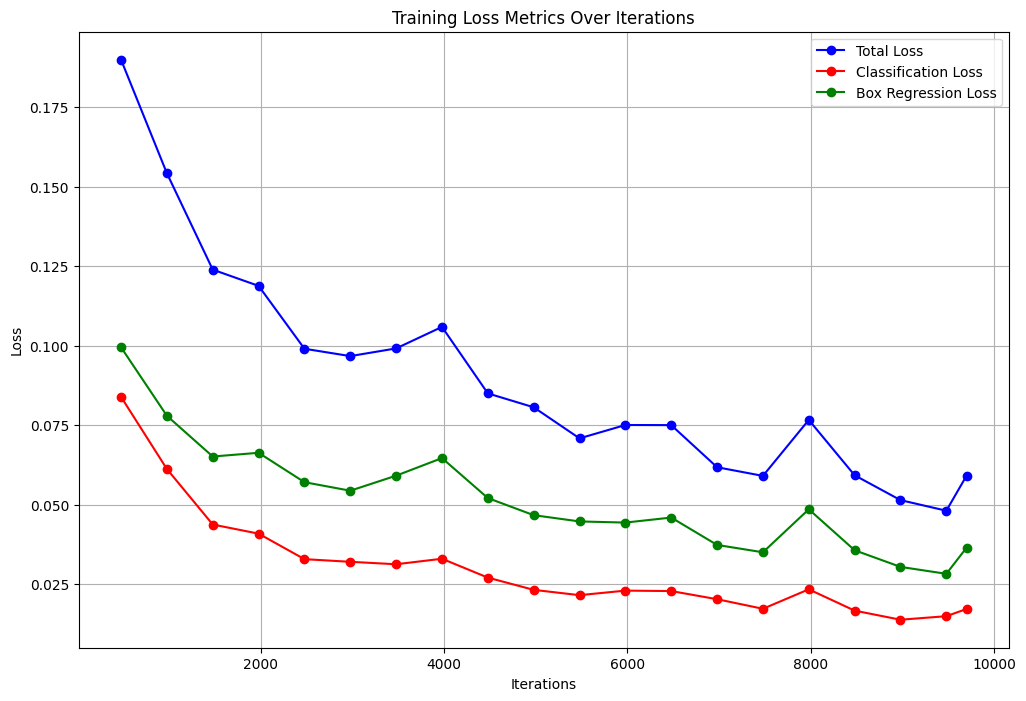

In [ ]:
import matplotlib.pyplot as plt
# Adjusted data to specifically represent total loss, classification loss, and box regression loss
iterations = [479, 979, 1479, 1979, 2479, 2979, 3479, 3979, 4479, 4979, 5479, 5979, 6479, 6979, 7479, 7979, 8479, 8979, 9479, 9699]
total_loss = [0.1899, 0.1542, 0.1239, 0.1188, 0.09903, 0.09672, 0.09914, 0.1059, 0.085, 0.08063, 0.07086, 0.07506, 0.07502, 0.06178, 0.05906, 0.07666, 0.05925, 0.05144, 0.04811, 0.05909]
loss_cls = [0.0839, 0.06122, 0.04377, 0.0409, 0.03288, 0.03205, 0.03128, 0.03301, 0.02708, 0.02323, 0.02156, 0.02299, 0.02285, 0.02029, 0.01728, 0.0234, 0.0167, 0.01384, 0.01495, 0.0172]
loss_box_reg = [0.09949, 0.07795, 0.06515, 0.06632, 0.05708, 0.0544, 0.05913, 0.06466, 0.05209, 0.04671, 0.04474, 0.04438, 0.04596, 0.03735, 0.03504, 0.04856, 0.03568, 0.03045, 0.02827, 0.03646]

# Plotting the data
plt.figure(figsize=(12, 8))

plt.plot(iterations, total_loss, label='Total Loss', marker='o', linestyle='-', color='blue')
plt.plot(iterations, loss_cls, label='Classification Loss', marker='o', linestyle='-', color='red')
plt.plot(iterations, loss_box_reg, label='Box Regression Loss', marker='o', linestyle='-', color='green')

plt.title('Training Loss Metrics Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()
